# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [33]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [34]:
data = pd.read_csv("ExtraaLearn.csv")

In [35]:
df = data.copy()
df.head(20)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0
5,EXT006,50,Unemployed,Mobile App,High,4,212,5.68200,Phone Activity,No,No,No,Yes,No,0
6,EXT007,56,Professional,Mobile App,Medium,13,625,2.01500,Website Activity,No,No,Yes,No,No,1
7,EXT008,57,Professional,Mobile App,Medium,2,517,2.98500,Email Activity,No,No,No,No,No,0
8,EXT009,57,Professional,Mobile App,High,2,2231,2.19400,Phone Activity,No,No,Yes,No,No,1
9,EXT010,59,Professional,Mobile App,High,1,1819,3.51300,Phone Activity,No,No,No,No,No,0


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

-Data contains 4612 rows, and 15 columns, with no missing values

-Most of the data are categorial, with only 5 out of 15 numerical features


In [37]:
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [38]:
df['status']=df['status'].astype(object)

- ID feature is  a unique number for each label in the data set, we can drop it , since it will not add anyting to our model, then we separate the categorial and numerical featrues

- status of the lead , is a binary categorial, so it is converted to object

In [39]:
df=df.drop('ID',axis=1)
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [40]:
cat_cols = df.select_dtypes(include = ["object", "category"]).columns.tolist()
num_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
print(cat_cols)
print(50*'-')
print(num_cols)

['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'status']
--------------------------------------------------
['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [41]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400


- There is diversity in the age from min 18 to max 63, with mean of 46 which is close to the median 51, we can say no outliers in the age

- In the website_visits we have min 0 , 75 percentile 5 ,with max 30, the max is very far form the 75 percentile

- The same we see in time-spent-on-website has a max of 2537 vs 1336 in 75 percentile

- Page-views-per-visit seems to have a good range with mean close to median 3

- Let check to see whether those outliers have meaning or not

- Exploratory data analysis 

- Univariant numerical analysis

In [42]:
# This funciton plots the histogran and boxplots, and showing mean & medians

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

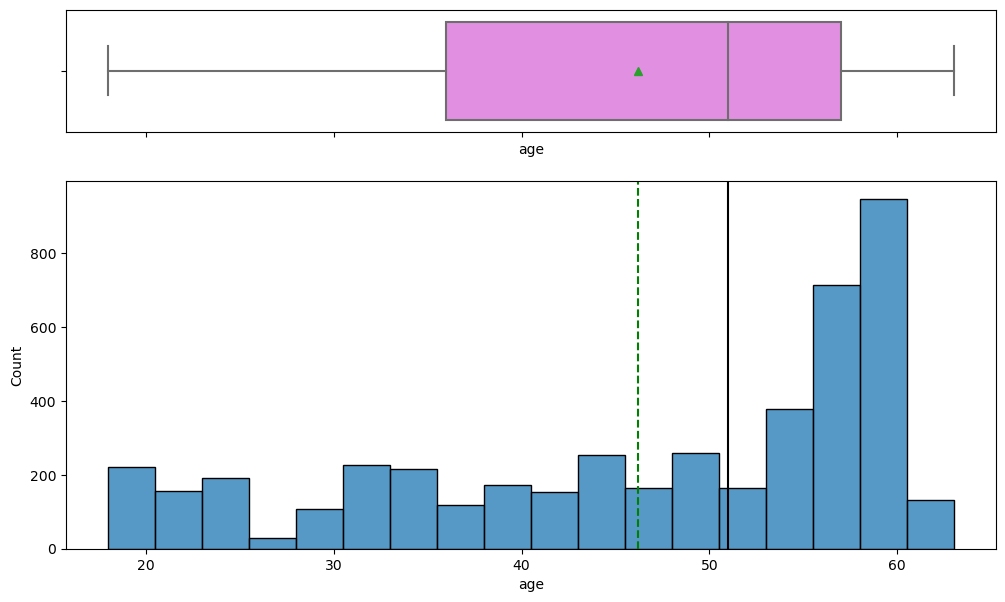

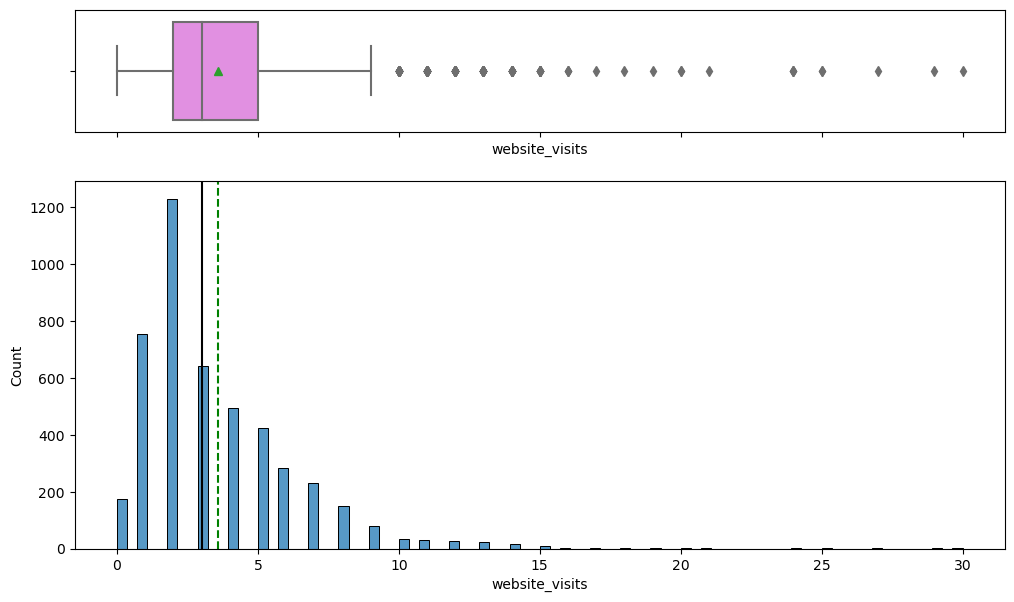

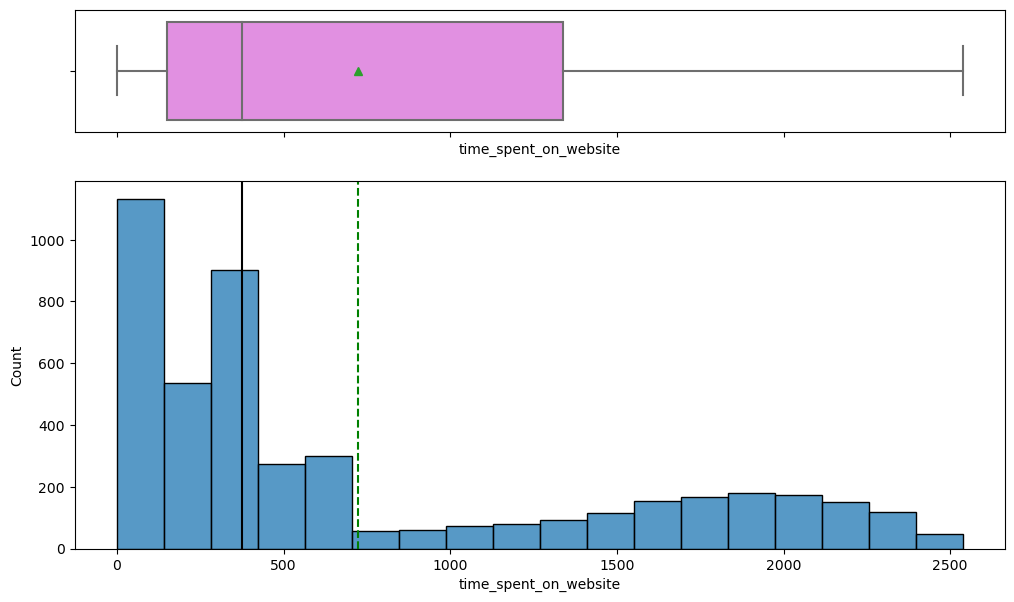

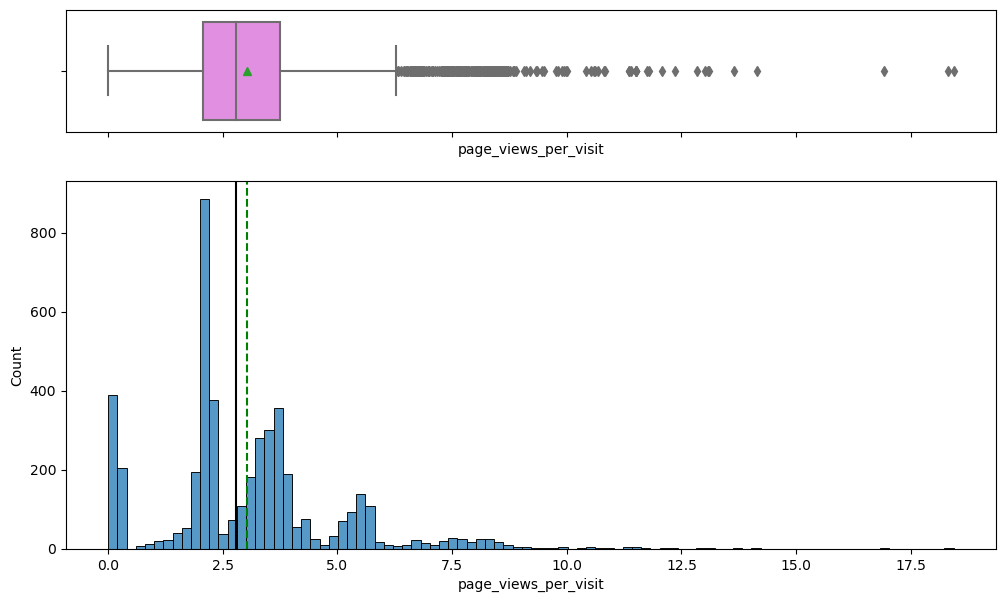

In [43]:
for i in num_cols:
    histogram_boxplot(data,i)
    

-web-site-visits seems to be right skewed, and have some outliers

-time_spent-on-website seems to have multi distributions, and has no outliers, skewed to the left

-page_views-per-visit seems to have multi distribution and have some outliers


In [44]:
high_visits=df[df['website_visits']>25]
high_visits

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
509,24,Student,Mobile App,Medium,30,388,3.56600,Website Activity,No,No,No,No,No,0
1759,20,Student,Website,High,27,417,2.07100,Email Activity,No,No,No,No,No,0
2694,20,Student,Mobile App,Medium,29,1152,3.86800,Phone Activity,No,No,No,Yes,No,0


In [45]:
high_page=df[df['page_views_per_visit']>15]
high_page

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0
32,58,Professional,Mobile App,High,12,1151,18.43400,Phone Activity,No,No,No,Yes,No,0
268,57,Professional,Mobile App,Medium,3,1009,18.30200,Phone Activity,No,No,No,No,No,0


-Outliers in the 2 features are only 3 records, which will not affect our analysis so i will keeo them

- Univariant categorial analysis

In [46]:
# Printing the % sub categories of each category
for col in cat_cols:
    print(df[col].value_counts(normalize=True))
    print('*'*45)

Professional   0.56722
Unemployed     0.31245
Student        0.12034
Name: current_occupation, dtype: float64
*********************************************
Website      0.55117
Mobile App   0.44883
Name: first_interaction, dtype: float64
*********************************************
High     0.49089
Medium   0.48591
Low      0.02320
Name: profile_completed, dtype: float64
*********************************************
Email Activity     0.49393
Phone Activity     0.26756
Website Activity   0.23851
Name: last_activity, dtype: float64
*********************************************
No    0.89224
Yes   0.10776
Name: print_media_type1, dtype: float64
*********************************************
No    0.94948
Yes   0.05052
Name: print_media_type2, dtype: float64
*********************************************
No    0.88573
Yes   0.11427
Name: digital_media, dtype: float64
*********************************************
No    0.84714
Yes   0.15286
Name: educational_channels, dtype: float64
*******

- 80 percent of the customers are from [professional,unemployed] current occupation, the professional are 50 percent of them

- It seems that the interaction happends in the website higher than mobile-app wiht 10 percents

- All our data are of high and medium profile_completed

- Interaction by email has 50 percent of the data. the other half distributed between phones and websites

- It seems that all the leads did not see the Ad in wether (magazine,educaional or referral)

- Lastly 30 percent of the cutomers are leads

- Now we will see how the status of the lead is related to diffenet categories (bivariate analysis)

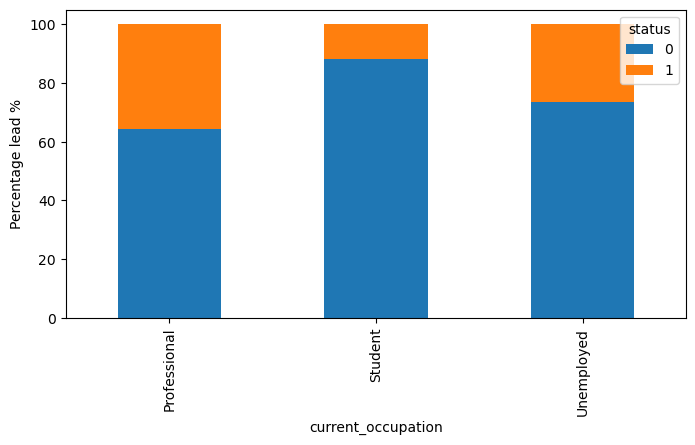

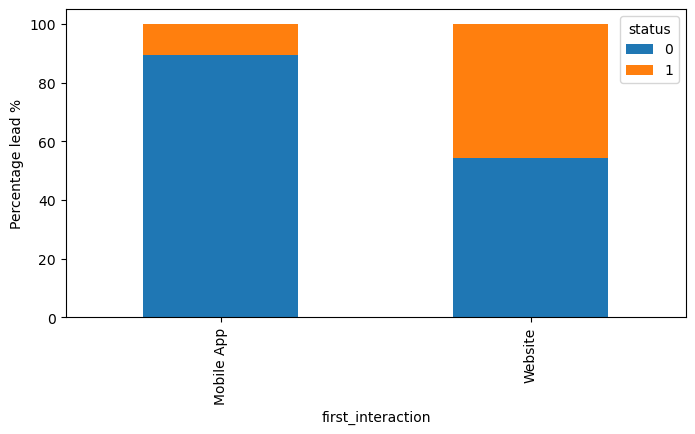

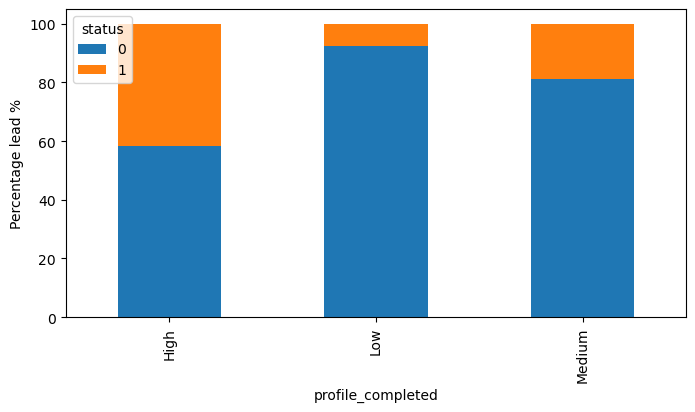

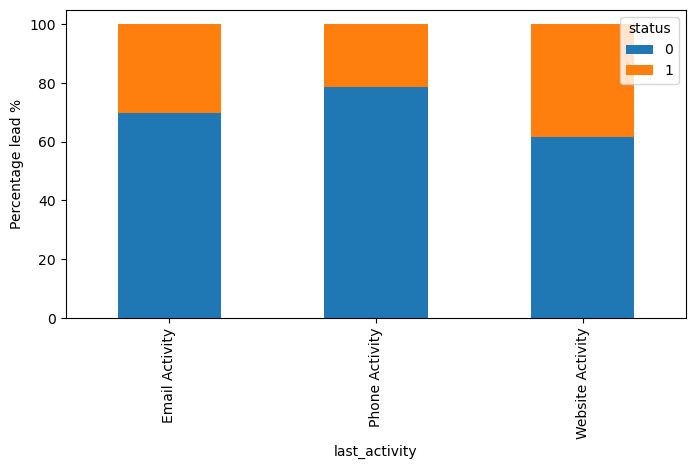

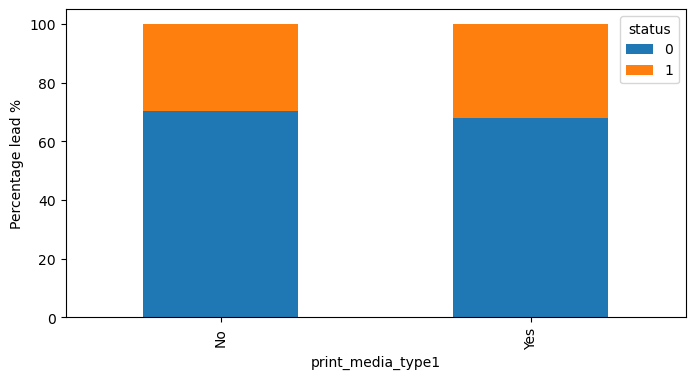

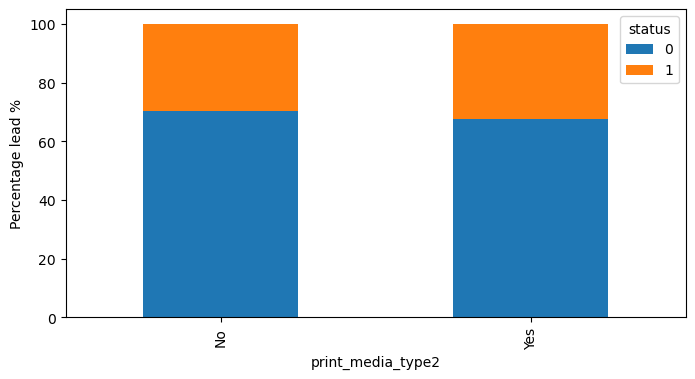

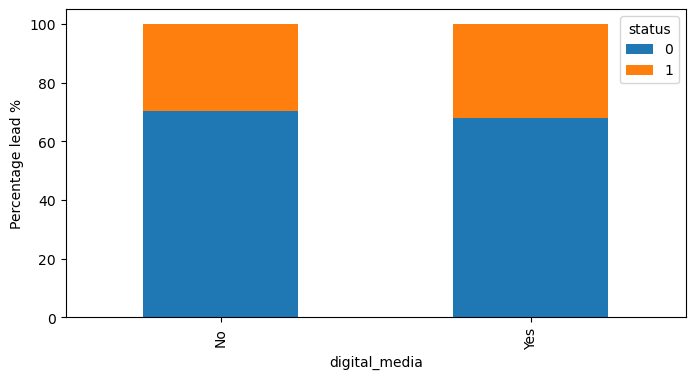

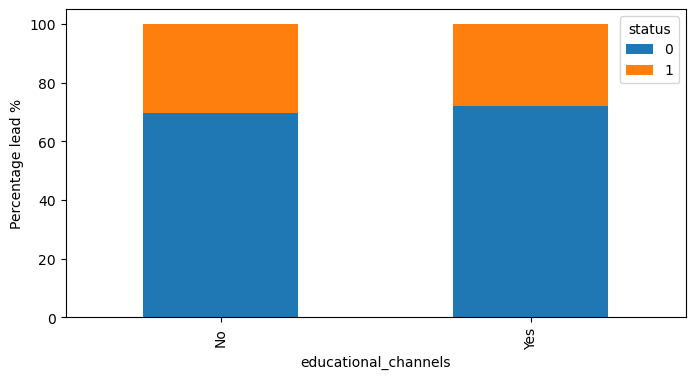

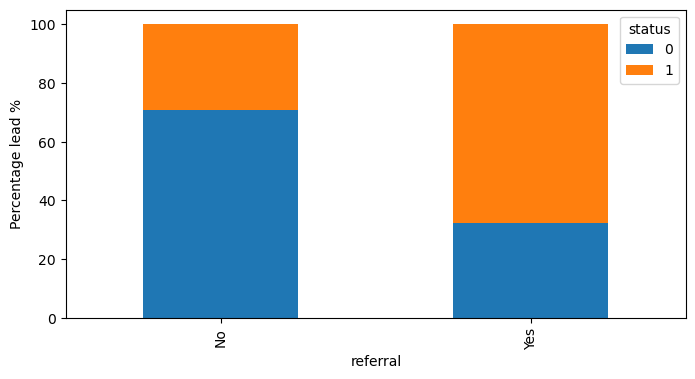

In [47]:
# status 1 : lead, 0 : no lead
for col in cat_cols:
    if col!='status':
        (pd.crosstab(df[col],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage lead %')

- So professional occupations has the highest leads, unemployed , comes after it , so occupation plays a great role in leads
- First interaction with website has more leads than app
- The higher profile completed the more the leads are
- last activity with the lead is more with the web-site
- Leads are affected with referral, more leads hear from refrence
- So the channels of interaction has no effect on leads, referral only has effect

In [48]:
df.groupby(['status'])[num_cols].median()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,49.00000,3.00000,317.00000,2.70600
1,54.00000,3.00000,789.00000,2.93500


- So yes, the more time spent on website, the more the leads, regarding queson number 5

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

<AxesSubplot:>

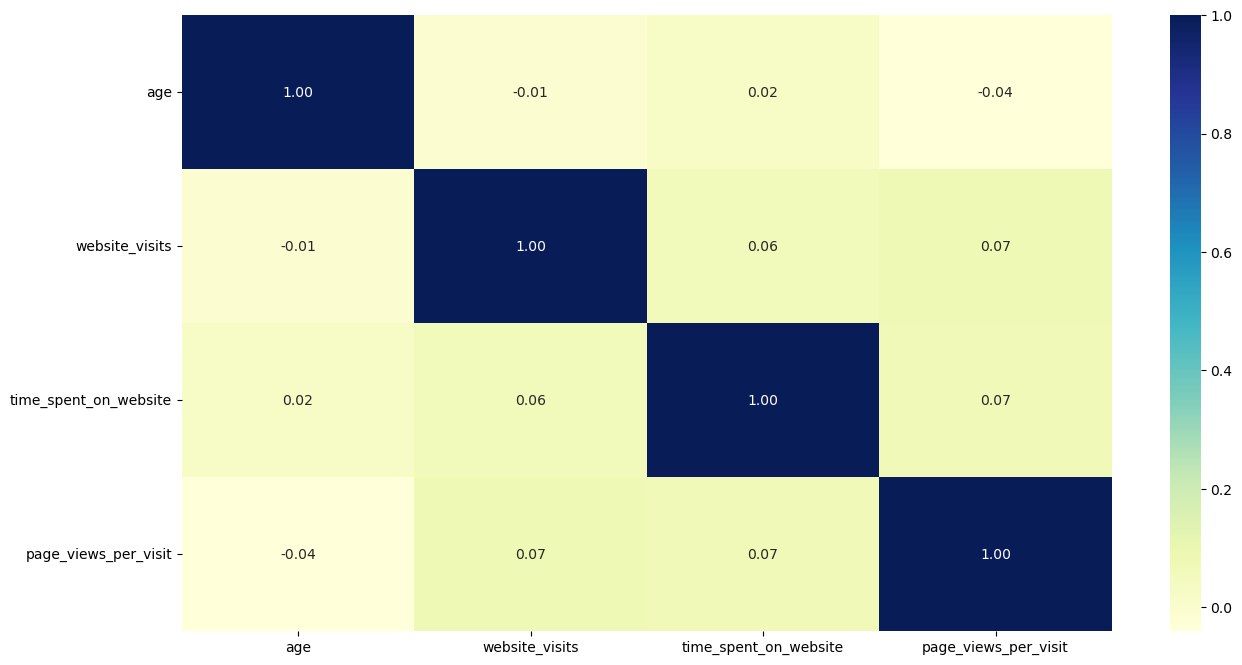

In [49]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

- There is minimal or no correlation between numerical features

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [50]:
# Creating dummy variables for the categorical columns
# drop_first=True is used to avoid redundant variables
df['status']=df['status'].astype(int)
df = pd.get_dummies(
    df,
    columns = df.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [51]:
df.head(10)

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.86100,1,0,1,1,0,0,0,1,1,0,1,0,0
1,56,2,83,0.32000,0,0,0,0,0,1,0,1,0,0,0,1,0
2,52,3,330,0.07400,0,0,0,1,0,1,0,1,0,0,1,0,0
3,53,4,464,2.05700,1,0,1,1,0,0,0,1,0,0,0,0,0
4,23,4,600,16.91400,0,1,0,1,0,0,0,0,0,0,0,0,0
5,50,4,212,5.68200,0,0,1,0,0,0,1,0,0,0,0,1,0
6,56,13,625,2.01500,1,0,0,0,0,1,0,1,0,0,1,0,0
7,57,2,517,2.98500,0,0,0,0,0,1,0,0,0,0,0,0,0
8,57,2,2231,2.19400,1,0,0,0,0,0,1,0,0,0,1,0,0
9,59,1,1819,3.51300,0,0,0,0,0,0,1,0,0,0,0,0,0


In [53]:
# Separating target variable and other variables

Y= df.status
X= df.drop(columns = ['status'])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)
X_train.shape

(3228, 16)

## Building a Decision Tree model

In [62]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)
# Fitting decision tree model
dt.fit(X_train, y_train)
y_train_pred_dt = dt.predict(X_train)

In [71]:
#evaluate training data
# Checking performance on the training dataset
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Lead', 'Lead'], yticklabels=['Not Lead', 'Lead'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()




              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



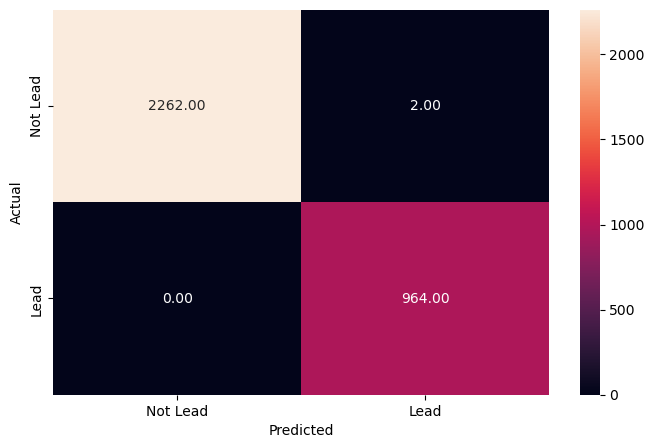

In [72]:
    
metrics_score(y_train, y_train_pred_dt)

- Decision Tree is giving almost 100 percent in precision and recall, so surely it is overfitting

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       971
           1       0.66      0.62      0.64       413

    accuracy                           0.79      1384
   macro avg       0.75      0.74      0.75      1384
weighted avg       0.79      0.79      0.79      1384



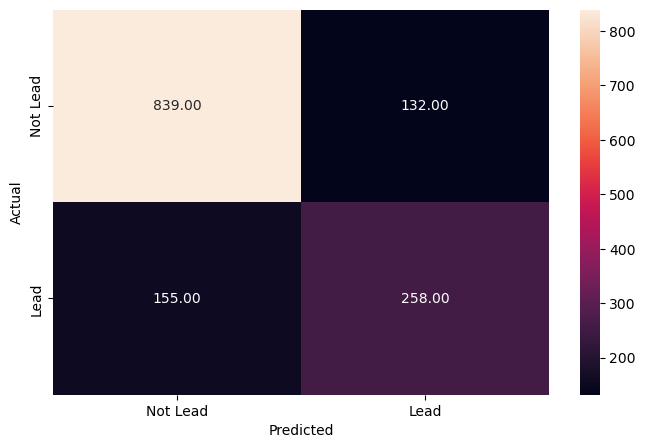

In [73]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

- Decision tree does not give good results in test data , which means overfitting, it gives low precision and recall 66, 62 %

- We need to prune the tree, and try random forests

<AxesSubplot:xlabel='Importance'>

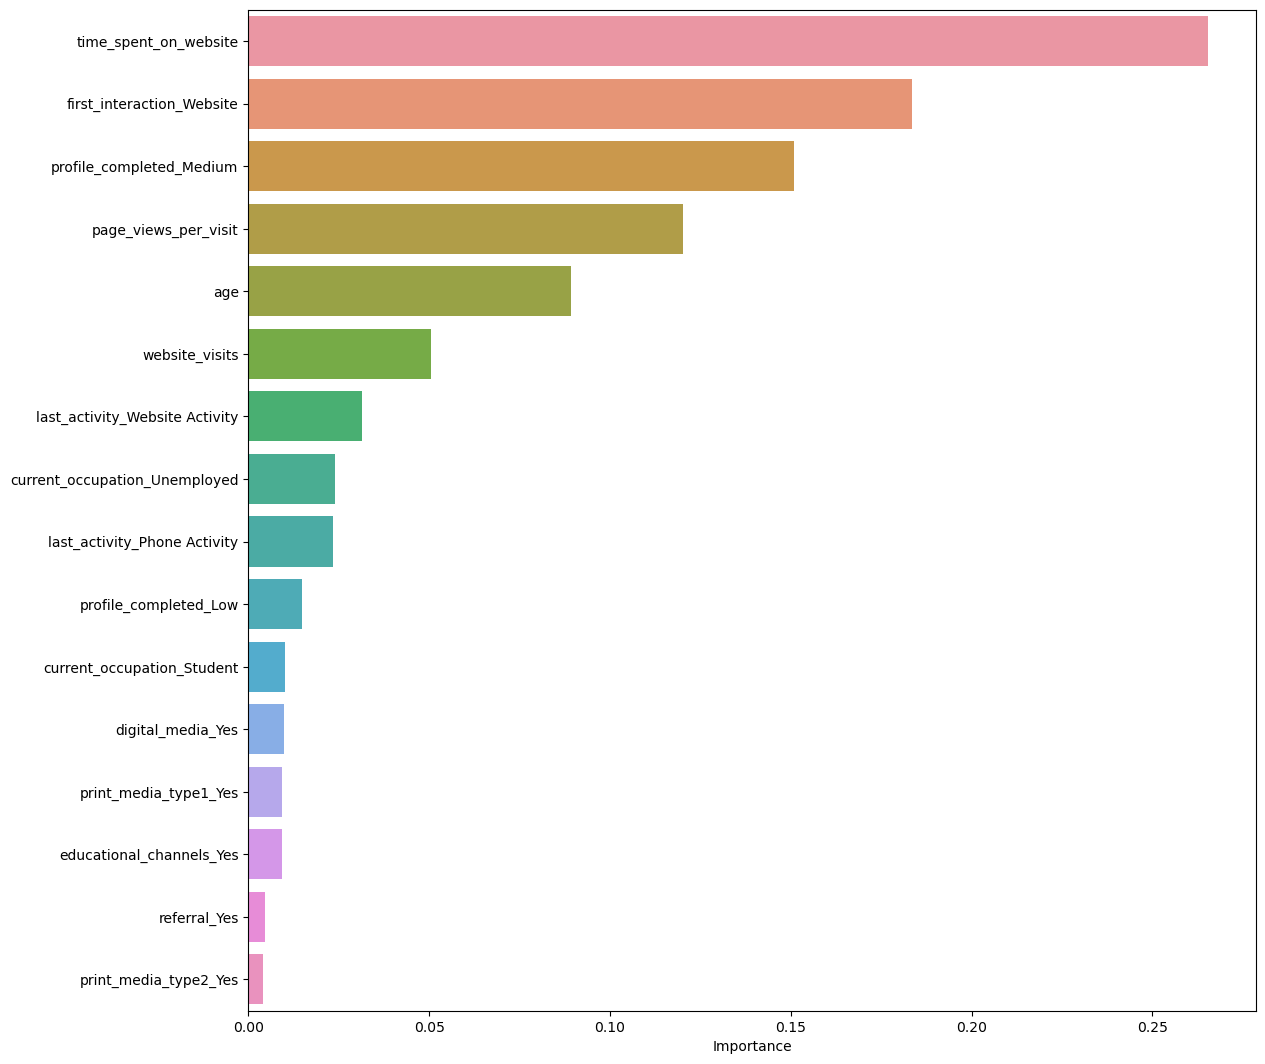

In [74]:
# Plot the feature importance

importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

- The most importand features for splitting in this tree, is the time spent on website, first interaciton_website,profile_completed



## Do we need to prune the tree?

In [78]:
# now we will try to use A hyperparamter alpha, which aids in pruning the tree, we see which alpha results in the highest score for the tree
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]
print(ccp_alphas, impurities)

clf_dts = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    clf_dts.append(dt)

[0.00000000e+00 7.74473358e-05 8.09676693e-05 1.91774355e-04
 1.99404635e-04 1.99642021e-04 2.06018793e-04 2.47831475e-04
 2.54469818e-04 2.57259846e-04 2.58157786e-04 2.58157786e-04
 2.58157786e-04 2.59096542e-04 2.62129444e-04 2.65533723e-04
 2.66982089e-04 2.71065675e-04 2.71065675e-04 2.71065675e-04
 2.75368305e-04 2.78810409e-04 2.78810409e-04 2.81626676e-04
 2.81626676e-04 2.83669850e-04 2.83973565e-04 2.84671288e-04
 2.85006196e-04 2.87661533e-04 2.87661533e-04 2.90427509e-04
 2.90427509e-04 2.97874369e-04 3.09789343e-04 3.09789343e-04
 3.09789343e-04 3.09789343e-04 3.11151055e-04 3.12229002e-04
 3.21263023e-04 3.21883222e-04 3.22697233e-04 3.27422171e-04
 3.31027856e-04 3.37952011e-04 3.38101899e-04 3.42043440e-04
 3.53869242e-04 3.54739170e-04 3.64458051e-04 3.71747212e-04
 3.71747212e-04 3.74624993e-04 3.75502234e-04 3.81279192e-04
 3.87236679e-04 3.89449460e-04 3.96600866e-04 4.11224056e-04
 4.11917698e-04 4.13052458e-04 4.13052458e-04 4.13052458e-04
 4.13052458e-04 4.130524

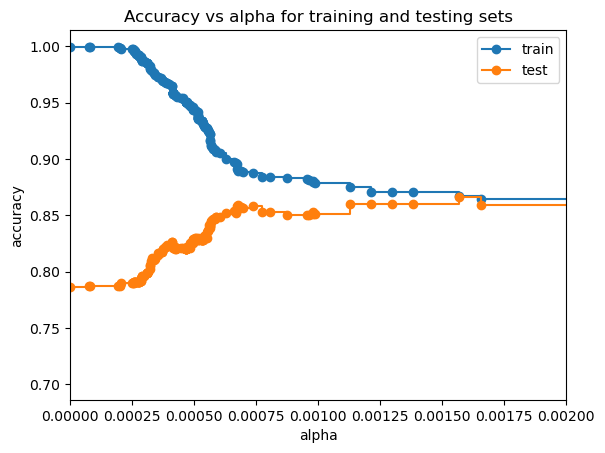

In [87]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
ax.set_xlim(0.000, 0.002)
plt.show()

- we small alpha of 0.0006 gives will give a better value for testing, but this stand only for the splitting we did tran and test, we could make cross validation wiht 5 or 10 folds , and choose best alpha instead

<AxesSubplot:xlabel='tree'>

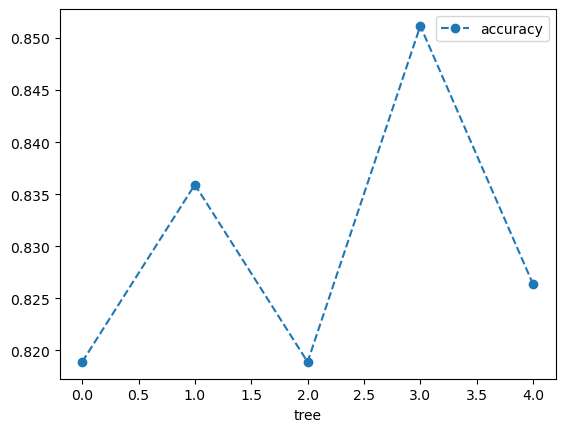

In [88]:
from sklearn.model_selection import cross_val_score # cross validation

clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0006)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

- So if we made cross validation with this alpha , it will not give the best accuracy for all splits, it only gives in one split

- So we will make cross validation and choose alpha again

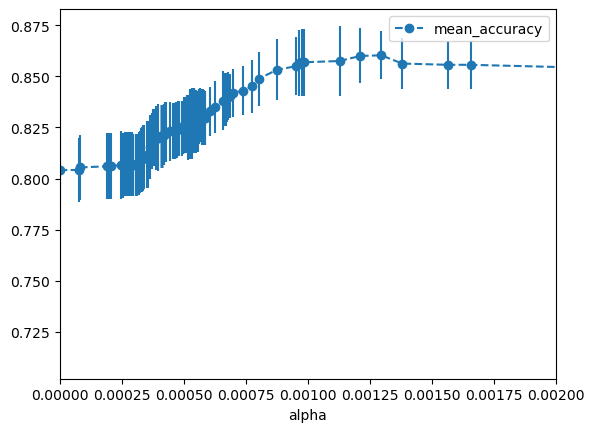

In [89]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

fig, ax = plt.subplots()
alpha_results.plot(x='alpha', 
                   y='mean_accuracy', 
                   yerr='std', 
                   marker='o', 
                   linestyle='--',
                   ax=ax)

# Set x-axis limit between 0.001 and 0.002
ax.set_xlim(0.0000, 0.002)
plt.show()


In [102]:
alpha_results[np.logical_and(alpha_results['alpha']> 0.00121, alpha_results['alpha']<0.00135)]
best_alpha = alpha_results.iloc[163,0]
best_alpha

0.0012976967223773594

- Alpha value of 0.00130 gives the best mean accuracy and less stdv, lets build a model with it 

In [105]:

clf_dt_pruned = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1,ccp_alpha = best_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train) 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       971
           1       0.66      0.62      0.64       413

    accuracy                           0.79      1384
   macro avg       0.75      0.74      0.75      1384
weighted avg       0.79      0.79      0.79      1384



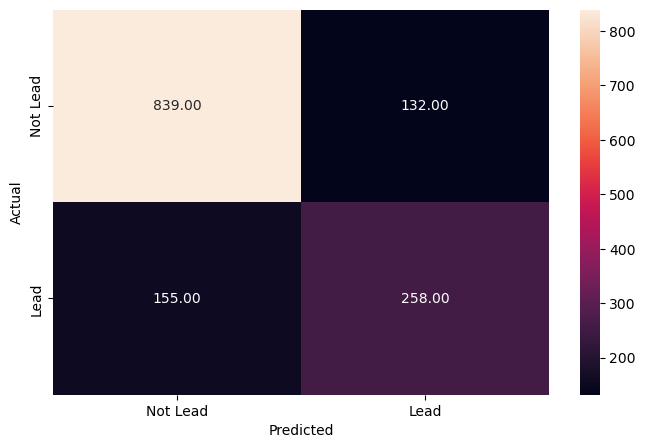

In [106]:
# Checking performance on the test dataset
y_test_pred_pruned =clf_dt_pruned.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

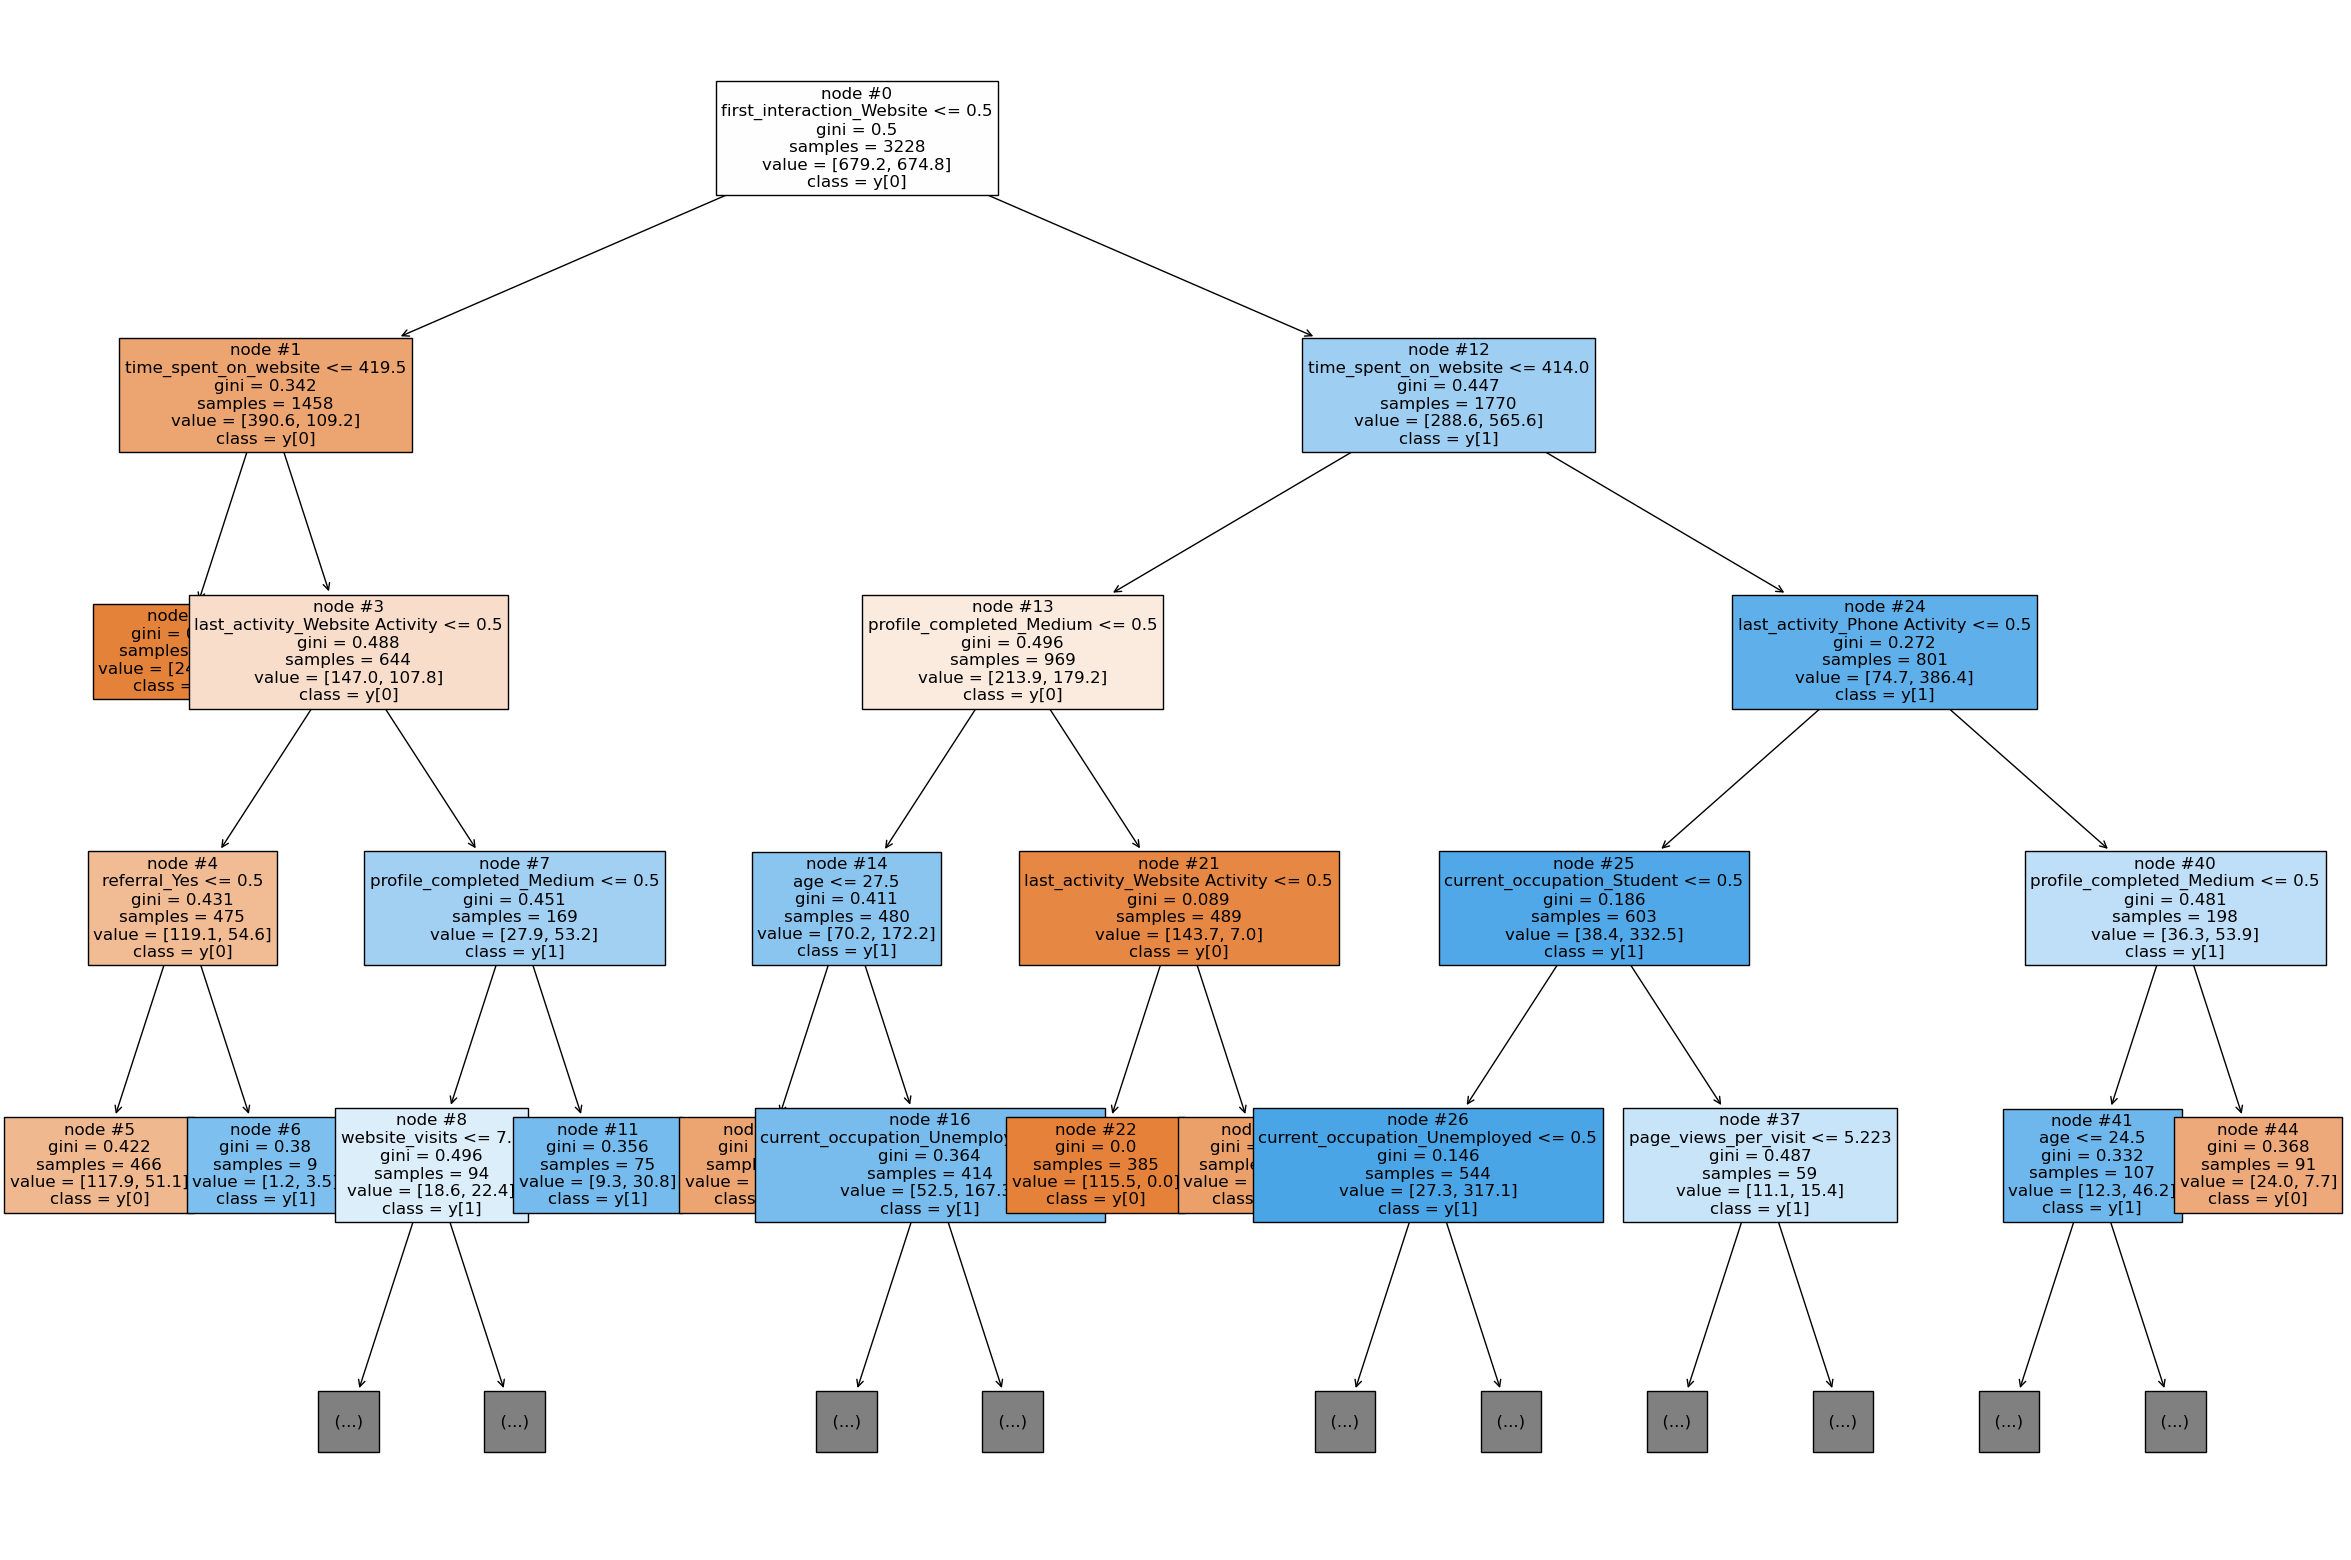

In [107]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(clf_dt_pruned, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

- We also got low precision, so we will try Random forest, we will have more randomness in sampling rows and features , and building many calssification trees, that votes together

## Building a Random Forest model

In [108]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



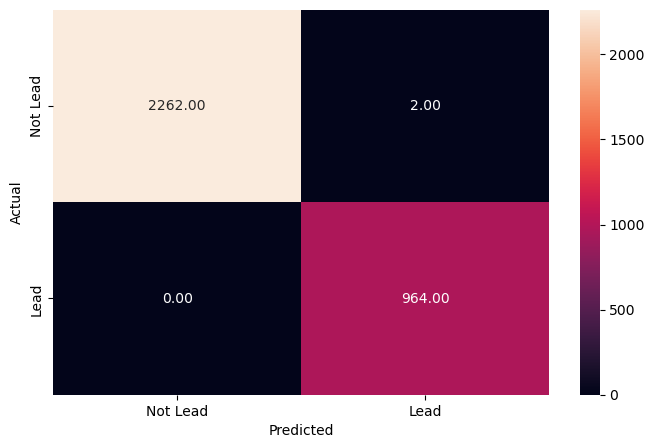

In [109]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       971
           1       0.81      0.72      0.76       413

    accuracy                           0.87      1384
   macro avg       0.85      0.82      0.83      1384
weighted avg       0.86      0.87      0.86      1384



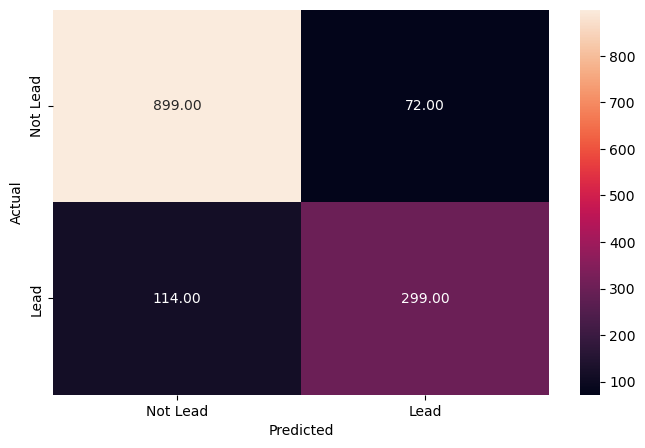

In [110]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

- Now our model has enhaced a bit, it has higher precision 0.8 vs 0.66, recall 0.73 vs 0 .63

- We will try to prune the random forest, to try different paramter for max_depth. minimum sample to cut off, which can minimze the recall error , noting that the model will takes time to run, not to much time

## Do we need to prune the tree?

In [113]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       971
           1       0.74      0.79      0.76       413

    accuracy                           0.85      1384
   macro avg       0.82      0.84      0.83      1384
weighted avg       0.86      0.85      0.86      1384



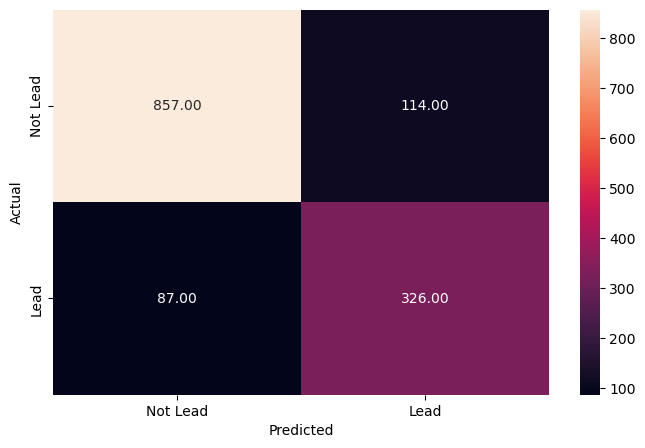

In [114]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

<AxesSubplot:xlabel='Importance'>

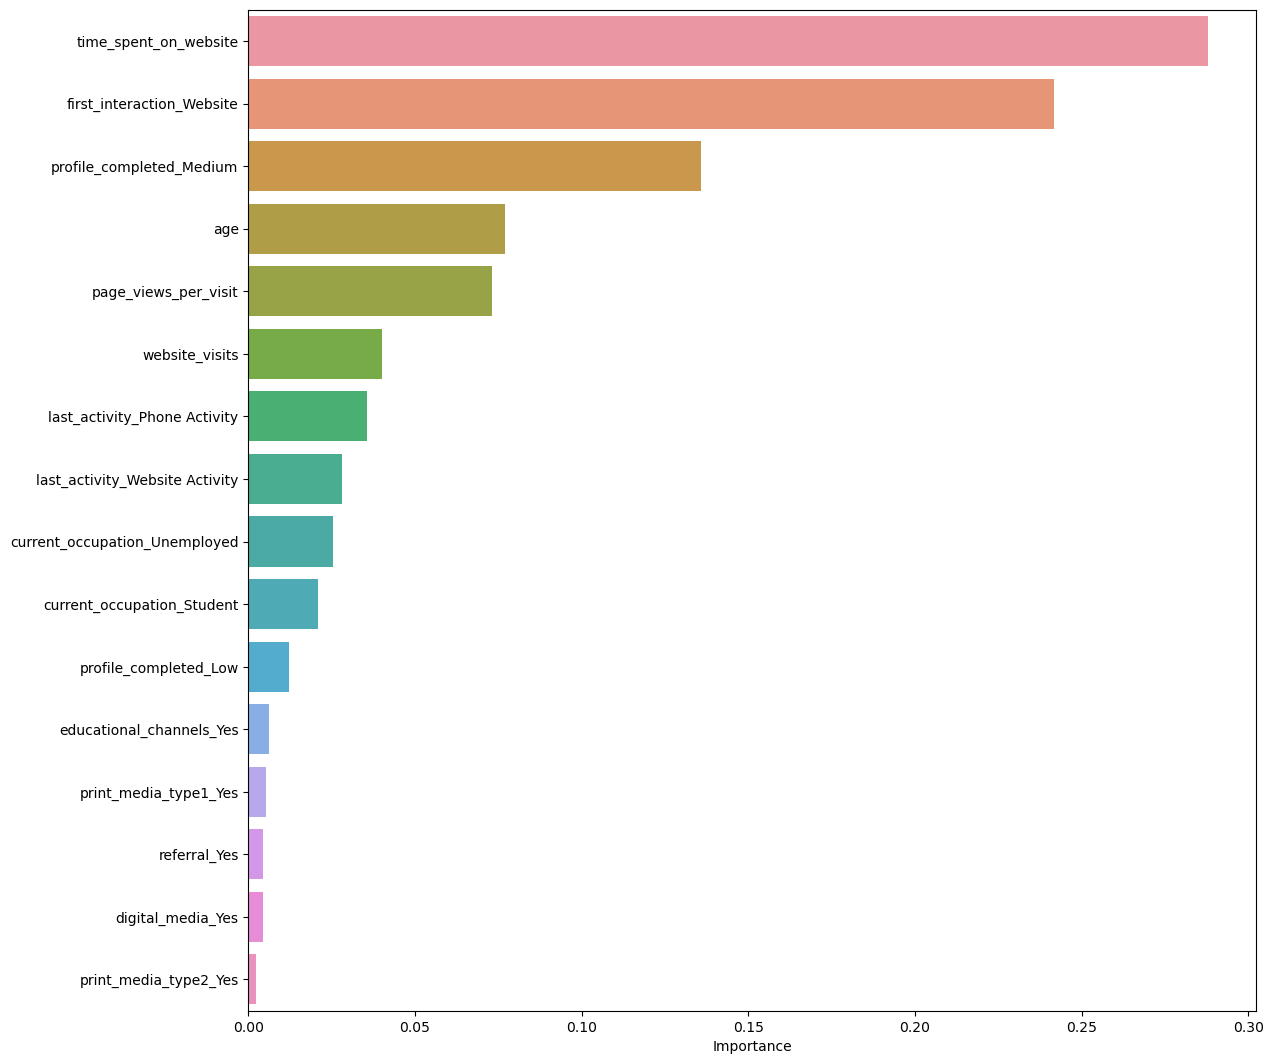

In [115]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

## Actionable Insights and Recommendations

- So the final tuned random forest has higher recall than other models we tried, in this analysis we are slightly interested with recall more than precesion,since we dont want to miss leads, we are excited to take each probability that a one is elad correct

- Like the first classification tree we draw, we have the time_spent_on_website is the most important feature, followed by first interaction , then profile completion

- Leads are higher when people first interact with website, spend moretime in it, and they hve high profile completed

- Recommendations

- Optimize Website Experience:
  Since time_spent_on_website is identified as a crucial factor, focus on optimizing the website experience to engage leads. Ensure that the website is user-friendly, provides relevant information, and encourages interaction.

- Enhance First Interaction:
  Given that the first_interaction is a significant factor, consider investing in strategies to enhance the initial interaction experience. This could include personalized content, engaging visuals, and clear calls-to-action.

 - Profile Completion:
  Encourage leads to complete their profiles by providing incentives or making the process more user-friendly. High profile completion is associated with higher lead conversion, so efforts should be made to guide users through the profile completion process.
 
-  Targeted Marketing:
   Given the importance of digital_media and educational_channels, consider refining your digital marketing strategy. Identify platforms and channels where your target audience is more likely to engage and tailor your marketing efforts accordingly.

- Customer Referral Program:
 Leverage the positive impact of referrals by implementing a customer referral program. Satisfied customers can become advocates and help in bringing in new leads. Consider providing incentives for successful referrals.   




- Finally we can make customer segmentation, with unspuervided ML model( KMeans or any simillar model) to group the customers , to understand them more , this combined to the rando forest will give a clear insight how customers are turned to lead
Thank you